In [1]:
#проверка подключения PostgreSQL 
import psycopg2
import pandas as pd
#Библиотека ждя визуализации
from IPython.display import HTML
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import matplotlib.pyplot as plt
#!введите свои реквизиты!
DB_HOST = '52.157.159.24'
DB_USER = 'student6'
DB_USER_PASSWORD = 'student6_password'
DB_NAME = 'sql_ex_for_student6'

conn = psycopg2.connect(host=DB_HOST, user=DB_USER, password=DB_USER_PASSWORD, dbname=DB_NAME)

/usr/local/lib/python3.7/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


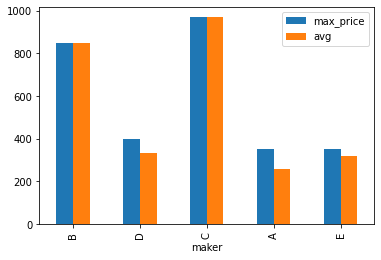

In [11]:
#Компьютерная фирма: Построить график с со средней и максимальной ценами на базе products_with_lowest_price (X: maker, Y1: max_price, Y2: avg)price
request = """
select distinct maker, max(price) over(partition by maker) as max_price, avg(price) over(partition by maker)  from products_with_lowest_price
"""
df = pd.read_sql_query(request, conn)
df.plot.bar(x = 'maker', y = ['max_price', 'avg'])
plt.show()

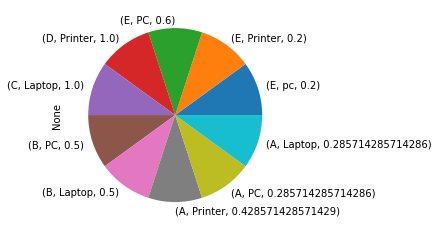

In [13]:
request = """
select * from distribution_by_type
"""
df = pd.read_sql_query(request, conn)
df.value_counts().plot.pie()
